# Part A :EDA & Feature Engineering

# (a) Exploratory Data Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# loading the dataset
df= pd.read_csv("Tweets.csv")

In [3]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [5]:
# Checking the dimensions and null values
dimensions = df.shape
null_values = df.isnull().sum()
column_names = df.columns.tolist()
print("dimensions:",dimensions)
print("null values:\n",null_values)

dimensions: (14640, 15)
null values:
 tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64


## Data Cleaning

In [6]:
# dropping the irrelevant columns
df.drop(columns=['tweet_id',
                 'airline_sentiment_gold',
                 'negativereason_gold',
                 'tweet_coord'],inplace=True)

In [7]:
# Filling the missing values
df['negativereason']=df['negativereason'].fillna('Unknown')
negConfMean=df['negativereason_confidence'].mean()
df['negativereason_confidence']=df['negativereason_confidence'].fillna(negConfMean)
df['tweet_location'] = df['tweet_location'].fillna(df['tweet_location'].mode()[0])
df['user_timezone']=df['user_timezone'].fillna(df['user_timezone'].mode()[0])

In [35]:
# dropping empty or whitespace-only the tweet texts
df['text']=df['text'].astype(str).str.strip()
df=df[df['text'].str.len()> 0]
print("\nShape after cleaning:",df.shape)
print("\nRemaining nulls(should be 0):\n",df.isnull().sum())


Shape after cleaning: (14640, 11)

Remaining nulls(should be 0):
 airline_sentiment               0
airline_sentiment_confidence    0
negativereason                  0
negativereason_confidence       0
airline                         0
name                            0
retweet_count                   0
text                            0
tweet_created                   0
tweet_location                  0
user_timezone                   0
dtype: int64


In [9]:
# creating a subset with only the relevant columns for modeling
df_model = df[['text','airline_sentiment']].copy()
# add a new column for tweet length in the modeling subset
df_model['text_length']=df_model['text'].apply(len)

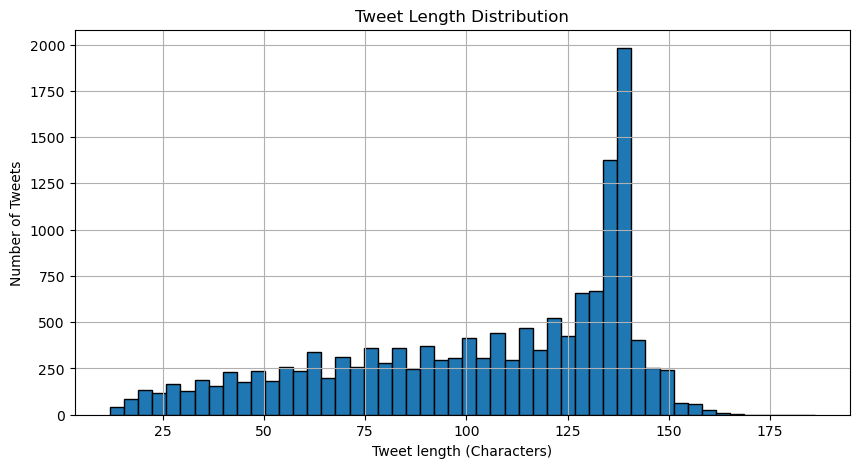

In [10]:
# Tweet Length Disbtribution
plt.figure(figsize=(10,5))
plt.hist(df_model['text_length'],bins=50 , edgecolor = 'black')
plt.title("Tweet Length Distribution")
plt.xlabel("Tweet length (Characters)")
plt.ylabel("Number of Tweets")
plt.grid(True)
plt.show()

C:\Users\dharu\AppData\Local\Temp\ipykernel_6480\3926245642.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_model,x='airline_sentiment',y='text_length',palette='pastel')


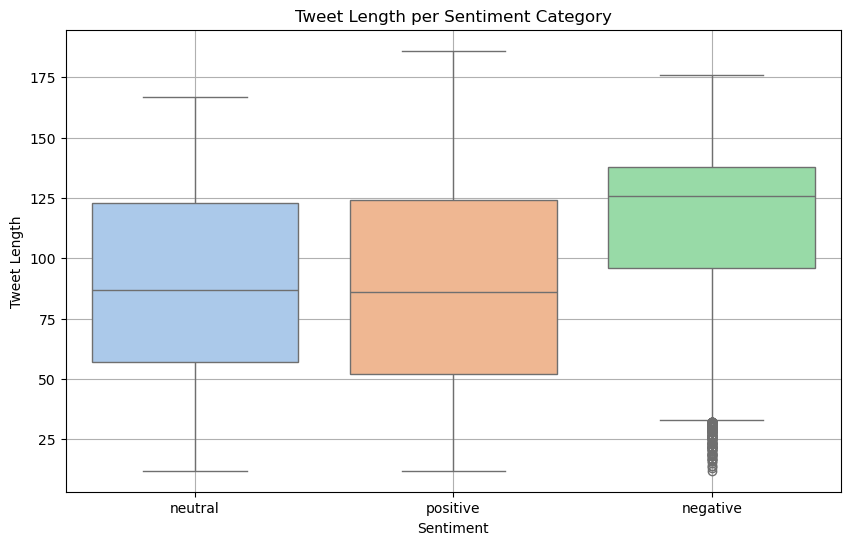

In [11]:
# Tweet length by Sentiment
plt.figure(figsize=(10,6))
sns.boxplot(data=df_model,x='airline_sentiment',y='text_length',palette='pastel')
plt.title("Tweet Length per Sentiment Category")
plt.xlabel("Sentiment")
plt.ylabel("Tweet Length")
plt.grid(True)
plt.show()

C:\Users\dharu\AppData\Local\Temp\ipykernel_6480\3383291366.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index , y= sentiment_counts.values,palette='Set2')


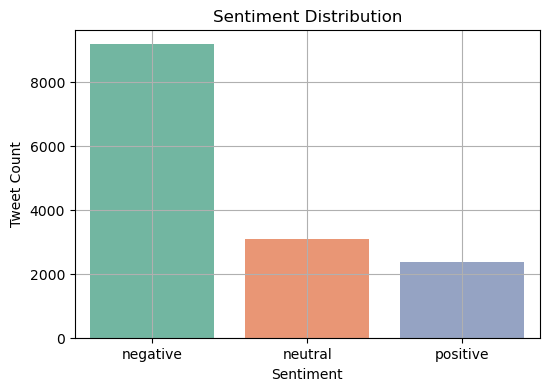

Sentiment Counts:
 airline_sentiment
negative    9178
neutral     3099
positive    2363
Name: count, dtype: int64

Sentiment Percentages:
 airline_sentiment
negative    62.69
neutral     21.17
positive    16.14
Name: count, dtype: float64


In [12]:
# Sentiment Label Proportions
sentiment_counts = df_model['airline_sentiment'].value_counts()
sentiment_percent = sentiment_counts/sentiment_counts.sum()*100
# construction of box plot
plt.figure(figsize=(6,4))
sns.barplot(x=sentiment_counts.index , y= sentiment_counts.values,palette='Set2')
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Tweet Count")
plt.grid(True)
plt.show()
print("Sentiment Counts:\n",sentiment_counts)
print("\nSentiment Percentages:\n",sentiment_percent.round(2))

#  Text Visualization

In [13]:
!pip install wordcloud

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dharu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


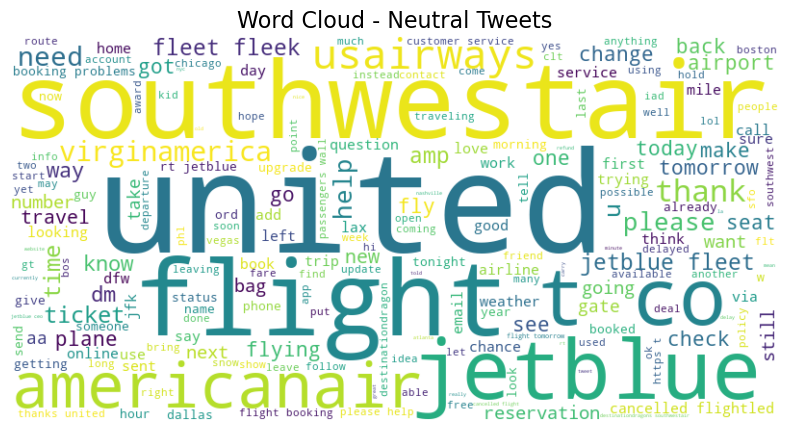

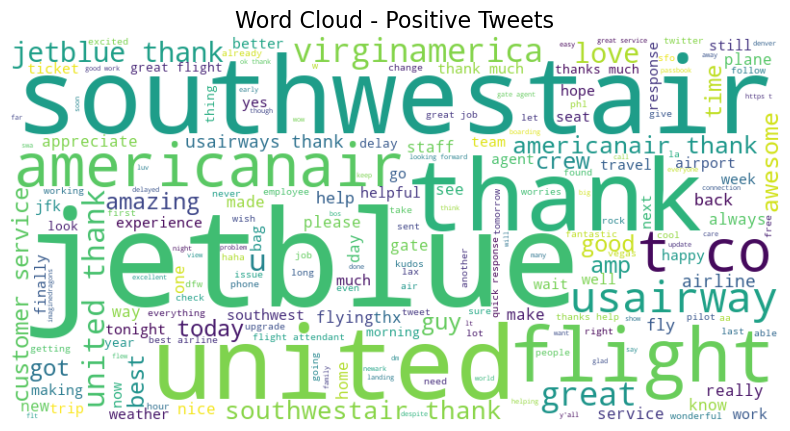

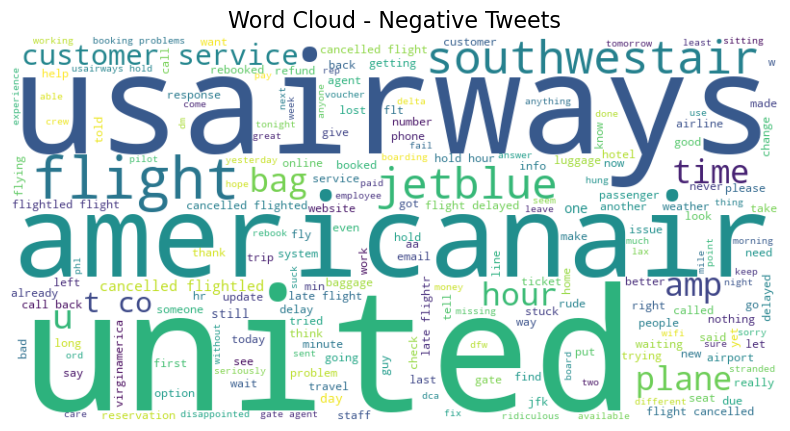

In [14]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate word clouds for each sentiment
import nltk
from nltk.corpus import stopwords
import string

nltk.download('stopwords')
stop_words = set(stopwords.words('english') + list(string.punctuation))

def preprocess_text(text):
    words = text.lower().split()
    return ' '.join([word for word in words if word not in stop_words])

for sentiment in df_model['airline_sentiment'].unique():
    text_data = df_model[df_model['airline_sentiment'] == sentiment]['text'].astype(str).apply(preprocess_text)
    combined_text = " ".join(text_data)
    
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_text)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Word Cloud - {sentiment.capitalize()} Tweets", fontsize=16)
    plt.show()


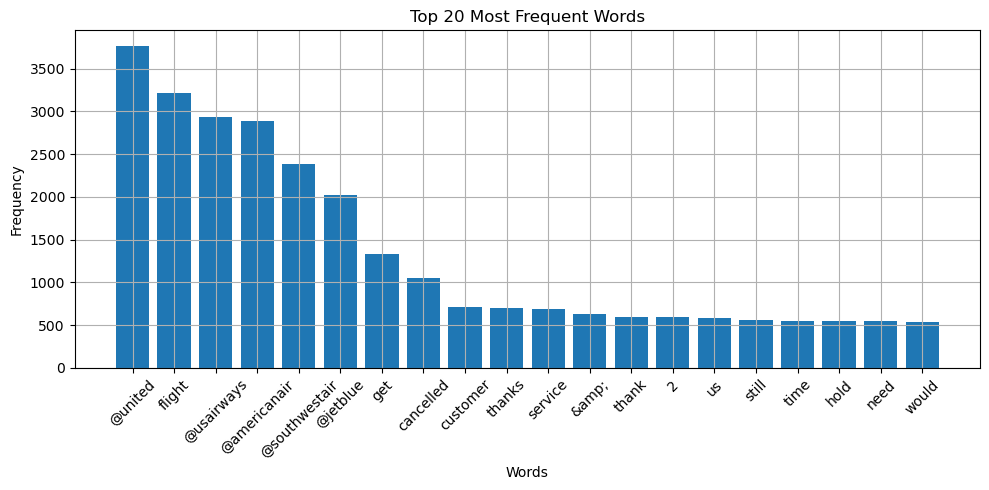

In [15]:
from collections import Counter
import re

# Preprocess all text
all_text = df_model['text'].astype(str).apply(preprocess_text).str.cat(sep=' ')
tokens = all_text.split()

# Count top N words
top_n = 20
most_common = Counter(tokens).most_common(top_n)

# Unzip for plotting
words, counts = zip(*most_common)

# Plot
plt.figure(figsize=(10, 5))
plt.bar(words, counts)
plt.title(f"Top {top_n} Most Frequent Words")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


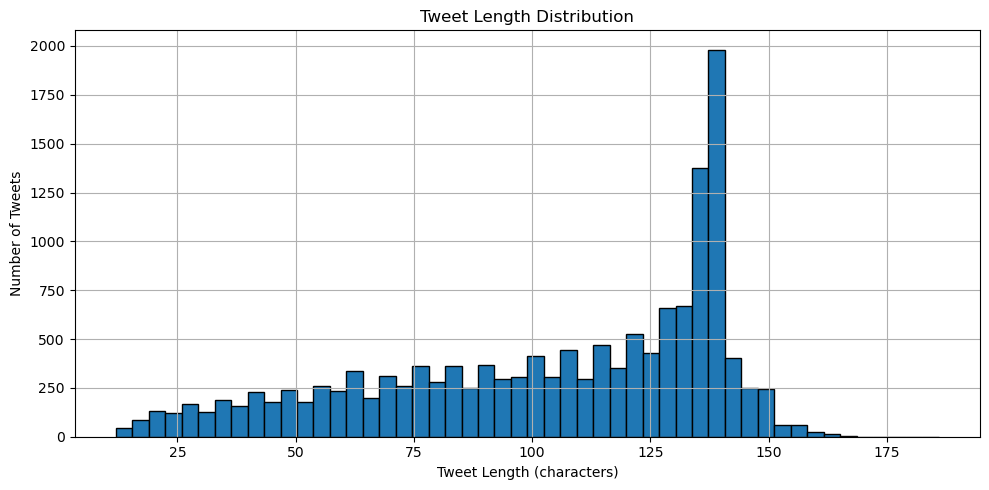

In [16]:
# Add tweet length column if not already added
df_model['text_length'] = df_model['text'].apply(len)

# Plot histogram
plt.figure(figsize=(10, 5))
plt.hist(df_model['text_length'], bins=50, edgecolor='black')
plt.title("Tweet Length Distribution")
plt.xlabel("Tweet Length (characters)")
plt.ylabel("Number of Tweets")
plt.grid(True)
plt.tight_layout()
plt.show()


(C) Preprocessing & Feature Engineering

In [17]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [18]:
import re
import nltk
import pandas as pd
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download necessary NLTK data
nltk.download('stopwords')
nltk.download('punkt_tab')        # Correct tokenizer
nltk.download('wordnet')



# Initialize stopwords and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def improved_clean_text(text):
    # Lowercase
    text = text.lower()
    # Remove URLs and HTML entities
    text = re.sub(r"http\S+|www\S+|&\w+;|@", "", text)
    # Remove all non-letter characters (keep only words)
    text = re.sub(r"[^a-z\s]", "", text)
    # Tokenize
    tokens = nltk.word_tokenize(text)
    # Remove stopwords and lemmatize
    cleaned_tokens = [
        lemmatizer.lemmatize(token) 
        for token in tokens 
        if token not in stop_words and len(token) > 2
    ]
    return " ".join(cleaned_tokens)

# Apply the text cleaning function
df_model['clean_text'] = df_model['text'].apply(improved_clean_text)

# Preview the cleaned text
df_model[['text', 'clean_text']].head()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dharu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\dharu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\dharu\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,text,clean_text
0,@VirginAmerica What @dhepburn said.,virginamerica dhepburn said
1,@VirginAmerica plus you've added commercials t...,virginamerica plus youve added commercial expe...
2,@VirginAmerica I didn't today... Must mean I n...,virginamerica didnt today must mean need take ...
3,@VirginAmerica it's really aggressive to blast...,virginamerica really aggressive blast obnoxiou...
4,@VirginAmerica and it's a really big bad thing...,virginamerica really big bad thing


In [19]:
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer()
X_bow = bow_vectorizer.fit_transform(df_model['clean_text'])
print("Bag of words shape:",X_bow.shape)

Bag of words shape: (14640, 12091)


In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(df_model['clean_text'])
print("TF-IDF SHAPE:",X_tfidf.shape)

TF-IDF SHAPE: (14640, 12091)


## Model Building

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Features and labels
X = df_model['clean_text']
y = df_model['airline_sentiment']

# Encode labels (string → integer)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Use TF-IDF vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf_vectorizer.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)


In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

lr_model = LogisticRegression(max_iter=200)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

print("Logistic Regression Report:")
print(classification_report(y_test, y_pred_lr, target_names=label_encoder.classes_))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))


Logistic Regression Report:
              precision    recall  f1-score   support

    negative       0.82      0.94      0.87      1835
     neutral       0.66      0.53      0.58       620
    positive       0.81      0.56      0.66       473

    accuracy                           0.79      2928
   macro avg       0.76      0.67      0.71      2928
weighted avg       0.78      0.79      0.78      2928

Confusion Matrix:
 [[1721   85   29]
 [ 260  327   33]
 [ 122   87  264]]


In [23]:
from sklearn.naive_bayes import MultinomialNB

nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)

print("Naive Bayes Report:")
print(classification_report(y_test, y_pred_nb, target_names=label_encoder.classes_))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))


Naive Bayes Report:
              precision    recall  f1-score   support

    negative       0.72      0.98      0.83      1835
     neutral       0.72      0.25      0.37       620
    positive       0.81      0.34      0.48       473

    accuracy                           0.72      2928
   macro avg       0.75      0.53      0.56      2928
weighted avg       0.73      0.72      0.68      2928

Confusion Matrix:
 [[1805   19   11]
 [ 440  154   26]
 [ 270   40  163]]


In [25]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.utils import to_categorical
import numpy as np

# Tokenize text
tokenizer = Tokenizer(num_words=5000, oov_token="<OOV>")
tokenizer.fit_on_texts(X)
X_seq = tokenizer.texts_to_sequences(X)
X_pad = pad_sequences(X_seq, maxlen=50)

# One-hot encode target
y_cat = to_categorical(y_encoded)

# Train-test split for LSTM
X_train_lstm, X_test_lstm, y_train_lstm, y_test_lstm = train_test_split(X_pad, y_cat, test_size=0.2, random_state=42, stratify=y_encoded)

# Build LSTM model
lstm_model = Sequential([
    Embedding(input_dim=5000, output_dim=64, input_length=50),
    LSTM(64),
    Dense(3, activation='softmax')
])

lstm_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train
lstm_model.fit(X_train_lstm, y_train_lstm, epochs=3, batch_size=64, validation_split=0.2)

# Evaluate
y_pred_lstm = np.argmax(lstm_model.predict(X_test_lstm), axis=1)
y_true_lstm = np.argmax(y_test_lstm, axis=1)

print("LSTM Report:")
print(classification_report(y_true_lstm, y_pred_lstm, target_names=label_encoder.classes_))
print("Confusion Matrix:\n", confusion_matrix(y_true_lstm, y_pred_lstm))


C:\Users\dharu\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/3
147/147 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - accuracy: 0.6409 - loss: 0.8871 - val_accuracy: 0.7550 - val_loss: 0.6151
Epoch 2/3
147/147 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - accuracy: 0.7984 - loss: 0.5179 - val_accuracy: 0.7917 - val_loss: 0.5398
Epoch 3/3
147/147 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - accuracy: 0.8565 - loss: 0.3734 - val_accuracy: 0.7879 - val_loss: 0.5544
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
LSTM Report:
              precision    recall  f1-score   support

    negative       0.85      0.89      0.87      1835
     neutral       0.64      0.58      0.61       620
    positive       0.73      0.67      0.70       473

    accuracy                           0.79      2928
   macro avg       0.74      0.71      0.73      2928
weighted avg       0.78      0.79      0.79      2928

Confusion Matrix:
 [[1637  142   56]
 [ 200  361   59]
 [  95   62  316]]


In [27]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Tokenize and pad text
tokenizer = Tokenizer(num_words=5000, oov_token="<OOV>")
tokenizer.fit_on_texts(df_model['clean_text'])
sequences = tokenizer.texts_to_sequences(df_model['clean_text'])
padded_sequences = pad_sequences(sequences, maxlen=50)

# Encode labels
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(df_model['airline_sentiment'])
y_categorical = to_categorical(y_encoded)

# Train-test split
X_train_rnn, X_test_rnn, y_train_rnn, y_test_rnn = train_test_split(
    padded_sequences, y_categorical, test_size=0.2, stratify=y_encoded, random_state=42
)


In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense

# Build RNN model
rnn_model = Sequential([
    Embedding(input_dim=5000, output_dim=64, input_length=50),
    SimpleRNN(64),
    Dense(3, activation='softmax')
])

# Compile
rnn_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train
rnn_model.fit(X_train_rnn, y_train_rnn, epochs=3, batch_size=64, validation_split=0.2)


Epoch 1/3


C:\Users\dharu\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


147/147 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.6436 - loss: 0.8509 - val_accuracy: 0.7461 - val_loss: 0.6220
Epoch 2/3
147/147 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.8157 - loss: 0.4826 - val_accuracy: 0.7712 - val_loss: 0.5879
Epoch 3/3
147/147 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.9163 - loss: 0.2653 - val_accuracy: 0.7704 - val_loss: 0.6602


# RNN Model Evaluation

This section evaluates the performance of the RNN model on the test dataset.  

- **Classification Report:** Shows precision, recall, and F1-score for each sentiment category (positive, negative, neutral).  
- **Confusion Matrix:** Displays how many tweets were correctly classified versus misclassified.  
  - Diagonal numbers = correct predictions  
  - Off-diagonal numbers = misclassifications  

By analyzing these metrics, we can understand how well the RNN model predicts sentiment compared to other models.


In [29]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

# Predict
y_pred_rnn = np.argmax(rnn_model.predict(X_test_rnn), axis=1)
y_true_rnn = np.argmax(y_test_rnn, axis=1)

# Evaluation
print(" RNN Classification Report:")
print(classification_report(y_true_rnn, y_pred_rnn, target_names=label_encoder.classes_))
print("Confusion Matrix:")
print(confusion_matrix(y_true_rnn, y_pred_rnn))


92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
 RNN Classification Report:
              precision    recall  f1-score   support

    negative       0.83      0.90      0.86      1835
     neutral       0.59      0.51      0.55       620
    positive       0.70      0.60      0.64       473

    accuracy                           0.77      2928
   macro avg       0.71      0.67      0.69      2928
weighted avg       0.76      0.77      0.76      2928

Confusion Matrix:
[[1651  131   53]
 [ 231  318   71]
 [ 103   86  284]]


# Model Evaluation Metrics

This section calculates and displays key performance metrics for all trained models: Logistic Regression, Naive Bayes, LSTM, and RNN.  

The metrics include:  
- **Accuracy:** Overall percentage of correct predictions.  
- **Precision:** How many of the predicted tweets for each sentiment were correct.  
- **Recall:** How many of the actual tweets for each sentiment were correctly identified.  
- **F1-Score:** Combined measure of precision and recall, giving an overall performance score.  

These metrics help us compare the models and see which one performs better on the airline tweet sentiment data.


In [30]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_model(name, y_true, y_pred):
    print(f"\n {name}")
    print("Accuracy :", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred, average='weighted'))
    print("Recall   :", recall_score(y_true, y_pred, average='weighted'))
    print("F1-Score :", f1_score(y_true, y_pred, average='weighted'))

evaluate_model("Logistic Regression", y_test, y_pred_lr)
evaluate_model("Naive Bayes", y_test, y_pred_nb)
evaluate_model("LSTM", y_true_lstm, y_pred_lstm)
evaluate_model("RNN", y_true_rnn, y_pred_rnn)  



 Logistic Regression
Accuracy : 0.7896174863387978
Precision: 0.7824509774445079
Recall   : 0.7896174863387978
F1-Score : 0.7782812723926166

 Naive Bayes
Accuracy : 0.7247267759562842
Precision: 0.7345376030235631
Recall   : 0.7247267759562842
F1-Score : 0.676640414805651

 LSTM
Accuracy : 0.7903005464480874
Precision: 0.7847493760263617
Recall   : 0.7903005464480874
F1-Score : 0.7866407270599847

 RNN
Accuracy : 0.7694672131147541
Precision: 0.7595654908591272
Recall   : 0.7694672131147541
F1-Score : 0.7624748006986641


# Misclassified Tweets Analysis

This section identifies and displays tweets that were misclassified by the LSTM model.  
- **Actual Sentiment:** The true label of the tweet.  
- **Predicted Sentiment:** What the model predicted.  
- **Tweet / Cleaned Tweet:** Original and preprocessed versions for comparison.  

By examining misclassified tweets, we can understand the types of errors the model makes and areas where it could be improved.  
Here, a random sample of 15 misclassified tweets is displayed for analysis.


In [32]:
# Convert back to original labels
y_true_labels = label_encoder.inverse_transform(y_true_lstm)
y_pred_labels = label_encoder.inverse_transform(y_pred_lstm)

# Find misclassified indices
misclassified_indices = np.where(y_true_labels != y_pred_labels)[0]

# Sample 15 misclassified examples
import random
random.seed(42)
sample_indices = random.sample(list(misclassified_indices), 15)

# Show them in a DataFrame
error_df = pd.DataFrame({
    'Tweet': [df_model.iloc[i]['text'] for i in sample_indices],
    'Cleaned Tweet': [df_model.iloc[i]['clean_text'] for i in sample_indices],
    'Actual Sentiment': [y_true_labels[i] for i in sample_indices],
    'Predicted Sentiment': [y_pred_labels[i] for i in sample_indices]
})

import pandas as pd
import ace_tools_open as tools; tools.display_dataframe_to_user(name="Misclassified Tweets", dataframe=error_df)


Misclassified Tweets


# Classification Reports for All Models

This section shows the classification reports for all trained models: Logistic Regression, Naive Bayes, LSTM, and RNN.  
A classification report includes **precision, recall, and F1-score** for each sentiment category (positive, negative, neutral).  
- **Precision:** Of all tweets predicted as a sentiment, how many were correct.  
- **Recall:** Of all tweets that actually belong to a sentiment, how many were correctly identified.  
- **F1-Score:** The harmonic mean of precision and recall, giving an overall measure of model performance.  

These metrics help us understand not only the overall accuracy but also how well each model predicts individual sentiment classes.


In [33]:
from sklearn.metrics import classification_report

# Logistic Regression
print("Logistic Regression Classification Report")
print(classification_report(y_test, y_pred_lr, target_names=label_encoder.classes_))

# Naive Bayes
print("\nNaive Bayes Classification Report")
print(classification_report(y_test, y_pred_nb, target_names=label_encoder.classes_))

# LSTM
print("\nLSTM Classification Report")
print(classification_report(y_true_lstm, y_pred_lstm, target_names=label_encoder.classes_))

# RNN
print("\nRNN Classification Report")
print(classification_report(y_true_rnn, y_pred_rnn, target_names=label_encoder.classes_))


Logistic Regression Classification Report
              precision    recall  f1-score   support

    negative       0.82      0.94      0.87      1835
     neutral       0.66      0.53      0.58       620
    positive       0.81      0.56      0.66       473

    accuracy                           0.79      2928
   macro avg       0.76      0.67      0.71      2928
weighted avg       0.78      0.79      0.78      2928


Naive Bayes Classification Report
              precision    recall  f1-score   support

    negative       0.72      0.98      0.83      1835
     neutral       0.72      0.25      0.37       620
    positive       0.81      0.34      0.48       473

    accuracy                           0.72      2928
   macro avg       0.75      0.53      0.56      2928
weighted avg       0.73      0.72      0.68      2928


LSTM Classification Report
              precision    recall  f1-score   support

    negative       0.85      0.89      0.87      1835
     neutral       0.64 

# Confusion Matrices for All Models

This section shows the confusion matrices for all trained models: Logistic Regression, Naive Bayes, LSTM, and RNN.  
A confusion matrix helps us understand how well the model is performing by showing the number of correct and incorrect predictions for each sentiment category (positive, negative, neutral).  
The diagonal values represent correctly predicted tweets, while off-diagonal values represent misclassifications.


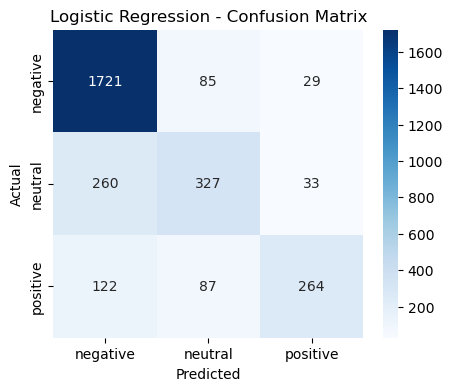

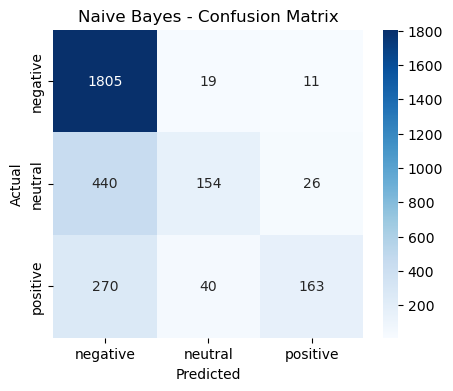

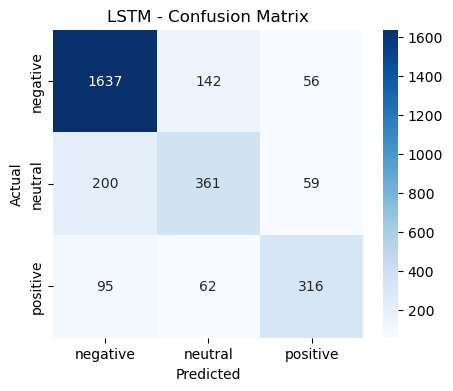

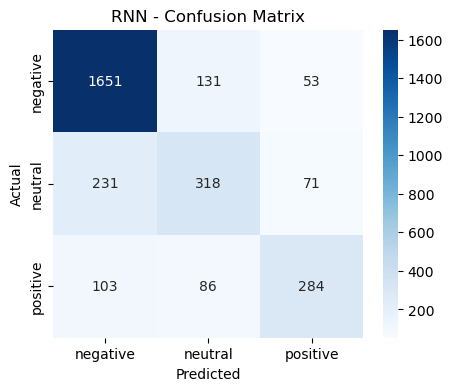

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_confusion(name, y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=label_encoder.classes_,
                yticklabels=label_encoder.classes_)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"{name} - Confusion Matrix")
    plt.show()

# Plot for each model
plot_confusion("Logistic Regression", y_test, y_pred_lr)
plot_confusion("Naive Bayes", y_test, y_pred_nb)
plot_confusion("LSTM", y_true_lstm, y_pred_lstm)
plot_confusion("RNN", y_true_rnn, y_pred_rnn)
